Title: Phylogenetic trees and unsupervised learning in the 16S rRNA region of bacteria

Author: Nyabuti Mainye

Date: 28/12/2017

The phylogenetic tree analysis project structure:
* Introduction: About organism comparison, phylogenetics: measurements and evolution and importance of this analysis.
* Data: Explanation about the data we'll be using and a glimpse of what we'll be trying to do
* Exploratory data analysis: Summary statistics (mean, mode, median) for example of the nucleic acid sequences to reveal insights to proceed with the analysis.
* Discussion: Based on what we've done in the previous step, a more detailed explanation of what's happening. 
* Conclusion: What i learned from the whole analysis.

# Introduction

These days the word DNA is being thrown around a lot and used as an excuse for observed traits in animals(phenotype this is called a trait you can observe). DNA is actually an acronymn meaning deoxyribonucleic acid, this is packaged in the nucleus of the cell, specifically in the chromosome and in mitochondrion in the context of animal cells. The good thing is that it's present in every living organism, DNA, i could be wrong. Some organisms such as viruses can have a variant of DNA rather a transcribed form of it; it's called RNA(ribonucleic acid). It can be single stranded or double stranded remember: measles virus and influenza virus those are great examples.


Long ago, no till now we've been using microscopy to see the differences between organisms. However, using this morphological standard is not the best method to classify organisms since some look the same as others and this can throw off your experiment for example *Mycobacterium* species. So in the work of Carl Woese, proposed using a conserved region called Ribosomal rna region(think of it as a string of characters consisting of ATGC) in bacteria. His discovery changed the world of microbial ecology and taxonomy since via he's method -- we can now discover more organisms than we could ever grow in culture media dealing with the **great plate count anomaly**. **The amount of difference between the strings is a measure of the amount of evolution that separates the organisms**. Remember this sentence it will come in handy in other sections of this study.

We are going to do phylogenetics which involves drawing tree diagrams similar to hierarchial clustering done in unsupervised learning, a technique in machine learning. This shows relationships between members and their sequences. The importance of such studies like this is to study evolutionary relationships, pattern divergence and generate hypotheses about gene and protein function.

# Data

We'll use a multifasta file, a common way of representing genomic features. However, they are usually for a similar region/locus of different organisms. In our case we'll be dealing with several microbial regions 16S ribosomal ribonucleic acid region in short, 16S rRNA, a part of the 30S small subunit of a prokaryotic ribosome. Why did i choose this region? it is a small region about 1500 nucleotides long with conserved and variable regions. The conserved region helps us identify the gene especially the V4 region where as the variable tell the species apart. This region doesn't evolve quickly and it also codes for the major ribosomal subunit. 

We'll be working with similar regions of 6 bacterial 16S Rrna regions from [NCBI](https://www.ncbi.nlm.nih.gov/)- obtained from 
mostly wounds of human beings. The organisms chosen are potentially dangerous since they could cause wound infections leading to bacteriema or septicemia. Intially, i was interested in look
ing at antibiotic resistant strains only but they proved to be very difficult to find in the
database mentioned. Below are the accession numbers, the names of the bacteria(italicized), the region and number of nucleotides(I counted these separately then appended the result):

NB. the .1 means the version of that particular record
* AM157442.1 *Streptococcus pneumoniae* 16S rRNA gene, clone 4V4 1,555 bp
* U01332.1 *Helicobacter pylori isolate* MC903 16S rRNA gene 1,503 bp
* LN871587.1 *Staphylococcus aureus partial* 16S rRNA gene, isolate A5 790bp
* FM207520.1 *Acinetobacter baumannii* partial 16S rRNA gene, strain CWS18 735bp
* HF564650.1 *Escherichia coli* partial 16S rRNA gene, isolate A2M11 844 bp
* FM207545.1 *Klebsiella pneumoniae* partial 16S rRNA gene, strain CWS45 679 bp

But the sequences are supposed to be ~1500 bases/nucleotides? For the organisms, i was interested in that wasn't the case. So i just worked with what i could get. The upside is that the sequences are not ranges within the gene. Hopefully, they'll align during the multiple sequence alignment.

A glimpse of the data we'll be working with:
>S.aureus_LN871587.1
CGGGGGGGTTTTTTTTTTTTAAGAGTTTTCCTCGTAGGATGAACGCTGGCGGCGTGCCTAATACATGCAA
GTCGAGCGAACGGACGAGAAGCTTGCTTCTCTGATGTTAGCGGCGGACGGGTGAGTAACACGTGGATAAC
CTACCTATAAGACTGGGATAACTTCGGGAAACCGGAGCTAATACCGGATAATATTTTGAACCGCATGGTT
CAAAAGTGAAAGACGGTCTTGCTGTCACTTATAGATGGATCCGCGCTGCATTAGCTAGTTGGTAAGGTAA
CGGCTTACCAAGGCAACGATGCATAGCCGACCTGAGAGGGTGATCGGCCACACTGGAACTGAGACACGGT
CCAGACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGC
GTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACATATGTGTAAGTAACTGTGC
ACATCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTG
GCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCC
ACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATG
TGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGA
CGCTGATTGCGAAAGATCGC


>A.baumannii_FM207520.1
GCTGGCGGCAGGCTTAACACATGCAAGTCGAGCGGGGGAAGGTAGCTTGCTACTGGACCTAGCGGCGGAC
GGGTGAGTAATGCTTAGGAATCTGCCTATTAGTGGGGGACAACATCTCGAAAGGGATGCTAATACCGCAT
ACGTCCTACGGGAGAAAGCAGGGGATCTTCGGACCTTGCGCTAATAGATGAGCCTAAGTCGGATTAGCTA
GTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCTGTAGCGGGTCTGAGAGGATGATCCGCCACACTGGG
ACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGGGGAACCCTGAT
CCAGCCATGCCGCGTGTGTGAAGAAGGCCTTATGGTTGTAAAGCACTTTAAGCGAGGAGGAGGCTACTTT
AGTTAATACCTAGAGATAGTGGACGTTACTCGCAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCG
GTAATACAGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGCTTATTAAGTC
GGATGTGAAATCCCCGAGCTTAACTTGGGAATTGCATTCGATACTGGTGAGCTAGAGTATGGGAGAGGAT
GGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGTCTGGAGGAATACCGATGGCGAAGGCAGCCATCT
GGCCTAATACTGACGCTGAGGTACGAAAGCAGGGG


# Exploratory Data analysis

If you were expecting summary statitstics and a graph here. Then you got it! What we are going to do here. Let's first count the number of bases per region in the different organisms.

Pseudocode:

Find a way to import the bases to your notebook.

Count the number of bases in each organism.

Generate summary status especially the median.

Draw a graph to see distribution of each nitrogenous base/base.

In [2]:
import pyperclip

ModuleNotFoundError: No module named 'pyperclip'

In [2]:
def import_nuc_segments ():
    '''displays text copied onto clipboard and shows the result
    Returns the text copied'''
    organism = pyperclip.paste()
    return (organism)

In [3]:
s_aureus = import_nuc_segments()
print (s_aureus)

CGGGGGGGTTTTTTTTTTTTAAGAGTTTTCCTCGTAGGATGAACGCTGGCGGCGTGCCTAATACATGCAA
GTCGAGCGAACGGACGAGAAGCTTGCTTCTCTGATGTTAGCGGCGGACGGGTGAGTAACACGTGGATAAC
CTACCTATAAGACTGGGATAACTTCGGGAAACCGGAGCTAATACCGGATAATATTTTGAACCGCATGGTT
CAAAAGTGAAAGACGGTCTTGCTGTCACTTATAGATGGATCCGCGCTGCATTAGCTAGTTGGTAAGGTAA
CGGCTTACCAAGGCAACGATGCATAGCCGACCTGAGAGGGTGATCGGCCACACTGGAACTGAGACACGGT
CCAGACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGC
GTGAGTGATGAAGGTCTTCGGATCGTAAAACTCTGTTATTAGGGAAGAACATATGTGTAAGTAACTGTGC
ACATCTTGACGGTACCTAATCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTG
GCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCC
ACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATG
TGTAGCGGTGAAATGCGCAGAGATATGGAGGAACACCAGTGGCGAAGGCGACTTTCTGGTCTGTAACTGA
CGCTGATTGCGAAAGATCGC


In [4]:
a_baumannii = import_nuc_segments()
print (a_baumannii)

GCTGGCGGCAGGCTTAACACATGCAAGTCGAGCGGGGGAAGGTAGCTTGCTACTGGACCTAGCGGCGGAC
GGGTGAGTAATGCTTAGGAATCTGCCTATTAGTGGGGGACAACATCTCGAAAGGGATGCTAATACCGCAT
ACGTCCTACGGGAGAAAGCAGGGGATCTTCGGACCTTGCGCTAATAGATGAGCCTAAGTCGGATTAGCTA
GTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCTGTAGCGGGTCTGAGAGGATGATCCGCCACACTGGG
ACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGGGGAACCCTGAT
CCAGCCATGCCGCGTGTGTGAAGAAGGCCTTATGGTTGTAAAGCACTTTAAGCGAGGAGGAGGCTACTTT
AGTTAATACCTAGAGATAGTGGACGTTACTCGCAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCG
GTAATACAGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGCTTATTAAGTC
GGATGTGAAATCCCCGAGCTTAACTTGGGAATTGCATTCGATACTGGTGAGCTAGAGTATGGGAGAGGAT
GGTAGAATTCCAGGTGTAGCGGGAAATGCGTAGAGTCTGGAGGAATACCGATGGCGAAGGCAGCCATCT
GGCCTAATACTGACGCTGAGGTACGAAAGCAGGGG


In [5]:
e_coli = import_nuc_segments()
print (e_coli)

TGCAGTCGAACGGTAACAGGAAGCAGCTTGCTGCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTG
GGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAA
AGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGG
CTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCA
GACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTG
TATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCT
CATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCA
AGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGG
GCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGT
AGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGC
TCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGAC
TTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGC
CGCA


In [6]:
k_pneumoniae = import_nuc_segments()
print (k_pneumoniae)

CGAGCGGTAGCACAGAGAGCTTGCTCTCGGGTGACGAGCGGCGGACGGGTGAGTAATGTCTGGGAAACTG
CCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAAAGTGGGGG
ACCTTCGGGCCTCATGCCATCAGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTA
GGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTA
CGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAAGCCATGCCGCGTGTGTGAAG
AAGGCCTTCGGGTTGTAAAGCACTTTCAGCGGGGAGGAAGGCGATAAGGTTAATAACCTTGTCGATTGAC
GTTACCCGCAGAAGAAGCCCCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTA
ATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAAC
CTGGGAACTGCATTCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTG
AAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGG


In [7]:
s_pneumoniae = import_nuc_segments()
print (s_pneumoniae)

TACGGTTACCTTGTTACGACTTCACCCCAATCATCTATCCCACCTTAGGCGGCTGGCTCCTTACGGTTAC
CTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATT
CACCGCGGCGTGCTGATCCGCGATTACTAGCGATTCCGACTTCATGTAGGCGAGTTGCAGCCTACAATCC
GAACTGAGACTGGCTTTAAGAGATTAGCTTGCCGTCACCGGCTTGCGACTCGTTGTACCAGCCATTGTAG
CACGTGTGTAGCCCAGGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTTCCTCCGGTTTATTAC
CGGCAGTCTCGCTAGAGTGCCCAACTCAATGATGGCAACTAACAATAGGGGTTGCGCTCGTTGCGGGACT
TAACCCAACATCTCACGACACGAGCTGACGACAACCATGCACCACCTGTCACCTCTGTCCCGAAGGAAAG
CTCTATCTCTAGAGCGGTCAGAGGGATGTCAAGACCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACC
ACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCCTTTGAGTTTCAACCTTGCGGTCGTACTCCCCAG
GCGGAGTGCTTAATGCGTTAGCTACGGCACTAAACCCCGGAAAGGGTCTAACACCTAGCACTCATCGTTT
ACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGAGCCTCAGCGTCAGTTACAA
GCCAGAGAGCCGCTTTCGCCACCGGTGTTCCTCCATATATCTACGCATTTCACCGCTACACATGGAATTC
CACTCTCCCCTCTTGCACTCAAGTTAAACAGTTTCTAAAGCGTACTATGGTTAAGCCACAGCCTTTAACT
TCAGACTTATCTAACCGCCTGCGGCTCGCTTTACGCCCAATAAATCCGGACAACGCTCGGGACCTACGTA
TTACCG

In [9]:
h_pylori = import_nuc_segments()
print (h_pylori)

TTTATGGAGAGTTTGATCCTGGCTCAGAGTGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAACGAT
GAAGCTTCTAGCTTGCTAGAATGCTGATTAGTGGCGCACGGGTGAGTAACGCATAGGTCATGTGCCTCTT
AGTTTGGGATAGCCATTGGAAACGATGATTAATACCAGATACTCCCTACGGGGGAAAGATTTATCGCTAA
GAGATCAGCCTATGTCCTATCAGCTTGTTGGTAAGGTAATGGCTTACCAAGGCTATGACGGGTATCCGGC
CTGAGAGGGTGAACGGACACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTAGGGAA
TATTGCTCAATGGGGGAAACCCTGAAGCAGCAACGCCGCGTGGAGGATGAAGGTTTTAGGATTGTAAACT
CCTTTTGTTAGAGAAGATAATGACGGTATCTAACGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCG
GTAATACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTC
AGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTA
GGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGC
TGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCAC
GCCCTAAACGATGGATGCTAGTTGTTGGAGGGCTTAGTCTCTCCAGTAATGCAGCTAACGCATTAAGCAT
CCCGCCTGGGGAGTACGGTCGCAAGATTAAAACTCAAAGGAATAGACGGGGACCCGCACAAGCGGTGGAG
CATGTGGTTTAATTCGAAGATACACGAAGAACCTTACCTAGGCTTGACATTGAGAGAATCCGCTAGAAAT
AGTGGA

We already know then length of each sequence. Let's proceed to the next step. Counting each base for the different organisms.

In [10]:
from collections import Counter

In [11]:
def count_nucleotide (organismbases):
    '''A function that takes a string of letters e.g ATCG, computes the number of bases, 
    sum of the bases and the most common bases provided.'''
    organismbases = organismbases.replace('\n', '') # removing newline characters
    count_base = Counter(organismbases) # count each base
    most_comm_base = count_base.most_common(2) # method to display the 2 most common bases
    print ("The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.")
    return count_base, sum(count_base.values()),most_comm_base # cumulating the results 

In [12]:
print (count_nucleotide(s_aureus)) 

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'G': 239, 'A': 213, 'T': 178, 'C': 160}), 790, [('G', 239), ('A', 213)])


In [13]:
print(count_nucleotide(a_baumannii))

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'G': 246, 'A': 190, 'T': 151, 'C': 147}), 734, [('G', 246), ('A', 190)])


In [14]:
print(count_nucleotide(e_coli))

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'G': 283, 'A': 207, 'C': 191, 'T': 163}), 844, [('G', 283), ('A', 207)])


In [15]:
print (count_nucleotide(h_pylori))

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'G': 434, 'A': 401, 'T': 342, 'C': 326}), 1503, [('G', 434), ('A', 401)])


In [16]:
print(count_nucleotide(s_pneumoniae))
# Ignore the "R" for now

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'C': 481, 'T': 394, 'G': 345, 'A': 334, 'R': 1}), 1555, [('C', 481), ('T', 394)])


In [17]:
print(count_nucleotide(k_pneumoniae))

The three results are the number of each nucleotide, sum of all nucleotides and the 2 most common bases found.
(Counter({'G': 232, 'A': 168, 'C': 155, 'T': 124}), 679, [('G', 232), ('A', 168)])


Interesting. Check the abundances of "G" and "A" they are the most common in almost every sequence, we've imported. Intially, while i was mindmapping writing this i wanted to use GC content. Now, i wanna use GA content. Not all organisms have the more GA notice *S.pneumoniae* is CT. Since our sequences differ in length which we will confirm later. Let's do more summary statistics and draw a graph.

In [18]:
import numpy as np
nuc_length = [790,735,844,679,1555,1503]
print("median nucleotide content" + " " + str(np.median(nuc_length)))
print("mean nucleotide content" + " " + str(np.mean(nuc_length)))

# working with small length of the sequence, we know that already

median nucleotide content 817.0
mean nucleotide content 1017.6666666666666


In [3]:
import pandas as pd

In [1]:
# Make a dataframe to use in the subsequent steps of the analysis
df = pd.DataFrame({"S.aureus": [239, 213, 178, 160],
                   "A.baumanii": [246, 190, 151, 147],
                   "E.coli": [283, 207, 163, 191],
                   "K.pneumoniae": [232, 168, 124, 155],
                   "S.pneumoniae": [345, 334, 394, 481],
                   "H.pylori": [434, 401, 342, 326]}, index = ["G", "A", "T", "C"])

# A different version of the above dataframe
df2 = pd.DataFrame({"G":[246,283,434,232,239,345],
                    "A":[190,207,401,168,213,334],
                    "T":[151,163,342,124,178,394],
                    "C":[147,191,326,155,160,481],
                    "organism":["A.baumanii","E.coli","H.pylori","K.pneumoniae"
                                ,"S.aureus","S.pneumoniae"]})

print (df)
print ("")
print (df2)

NameError: name 'pd' is not defined

In [5]:
%store df


Stored 'df' (DataFrame)


In [6]:
%store df2

Stored 'df2' (DataFrame)


In [8]:
# get the appropriate bases to count
# cs
def gc_content(seq):
    '''gc_content takes a sequence of characters
    counts the number of Cs and Gs within in the sequence
    returns (g+c)/(number of all characters) * 100 - percentage'''
    gc = (seq.count("C") + seq.count("G")) / (len(seq)) * 100
    return gc

def ga_content(seq):
    '''ga_content takes a sequence of characters counts the number of Gs and As
    within the sequence
    returns (g+a)/(number of all characters) * 100 - percentage'''
    ga = (seq.count("G") + seq.count("A")) / (len(seq))  * 100
    return ga

In [9]:
# applying the function to each sequence we imported for the different organisms
gc_a_baumanii = gc_content(a_baumannii)
gc_e_coli = gc_content(e_coli)
gc_h_pylori = gc_content(h_pylori)
gc_k_pneumoniae = gc_content(k_pneumoniae)
gc_s_aureus = gc_content(s_aureus)
gc_s_pneumoniae = gc_content(s_pneumoniae)

NameError: name 'a_baumannii' is not defined

In [23]:
# Do the same thing to each
ga_a_baumanii = ga_content(a_baumannii)
ga_e_coli = ga_content(e_coli)
ga_h_pylori = ga_content(h_pylori)
ga_k_pneumoniae = ga_content(k_pneumoniae)
ga_s_aureus = ga_content(s_aureus)
ga_s_pneumoniae = ga_content(s_pneumoniae)

In [24]:
# make new columns to populate the dataframe with appropriate contents : GC and GA
df2.insert(loc=4, column='GC_content', value=[gc_a_baumanii, gc_e_coli, gc_h_pylori, gc_k_pneumoniae, gc_s_aureus
                                           ,gc_s_pneumoniae]) 

df2.insert(loc=5, column='GA_content', value=[ga_a_baumanii, ga_e_coli, ga_h_pylori, ga_k_pneumoniae, ga_s_aureus,
                                              ga_s_pneumoniae])

In [25]:
# confirmation
print (df2)

     A    C    G    T  GC_content  GA_content      organism
0  190  147  246  151   52.822581   58.602151    A.baumanii
1  207  191  283  163   55.373832   57.242991        E.coli
2  401  326  434  342   49.868766   54.790026      H.pylori
3  168  155  232  124   56.250000   58.139535  K.pneumoniae
4  213  160  239  178   49.812734   56.429463      S.aureus
5  334  481  345  394   52.377933   43.056436  S.pneumoniae


In [7]:
# for clustering
content_nuc = df2[["GC_content","GA_content"]]

print ("")
print(type(content_nuc))
print ("")
print (content_nuc)

KeyError: "['GC_content' 'GA_content'] not in index"

Now that we've made preparations to our data. We can proceed to do the next step. Which was "Draw a graph to see distribution of each base".

In [27]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.charts import Bar
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import column, row
from bokeh.palettes import Spectral5

In [28]:
# draw all the bar plots
p = Bar(df2, label = 'organism', values="A",agg ="sum", color="organism",plot_width=450)
p2 = Bar(df2, label = 'organism', values="T",agg ="sum", color="organism",plot_width=450)
p3 = Bar(df2, label = 'organism', values="C",agg ="sum", color="organism",plot_width=450)
p4 = Bar(df2, label = 'organism', values="G",agg ="sum", color="organism",plot_width=450)

# make a Panels to store the plot objects: check out the docs in the references.txt
first_second = Panel(child=row(p,p2), title = "A and T")
third_fourth = Panel(child=row(p3,p4), title = "C and G")

# make tabs like the ones you use in browsers
tabs = Tabs(tabs=[first_second, third_fourth])

In [29]:
# store the output in the notebook and show the plot
# if you can't see some colors well you can just change them
output_notebook()
show(tabs)

Loading BokehJS ...

One quick observation you can see is *H.pylori* and *S.pneumoniae* have the most of each base. This is due to the fact we got the whole sequence. Remember that the whole sequence ~1500 bases. On the contrary, the rest are lower compared those two. Also, the GC content calculated above is rather high -- this is indicative of prokaryotic DNA whereas, eukaryotic DNA such as Human beings(*Homo sapiens*) DNA is about 50%. We can use these differences in GC content to differenciate them. 

Back to phylogeny. I went ahead and made phylogenetic trees with the maximum likelihood method and distance based methods -- I'll talk about these later. They both produced different types of output. Yet i used the default parameters in different implementations. To add on this, i used online tools [Clustal Omega](https://www.ebi.ac.uk/Tools/msa/clustalo/) which is a quick way of doing this.

<p align="center">
<img src="images/clustal_omega_msa_defaultparams_phylogenetics.png" width="550"> <br>
<figcaption>Above is a tree generated with clustal omega default parameters Maximum likelihood.</figcaption>
</p>

<p align="center">
<img src="images/mega7_ML_bootstrap_phylotree.png" width="550"> <br>
<figcaption>The last one uses Neigbour joining method. Also, done using [MEGA7](http://megasoftware.net/).</figcaption>
</p>

<p align="center">
<img src="images/mega7_NJ_boostrap_phylotree.png" width="550"> <br>
<figcaption>The last one uses Neigbour joining method. Also, done using MEGA7.</figcaption>
</p>

Before moving into the discussion. Let's try making the above tree diagrams with an unsupervised learning method: Hierarchical clustering.

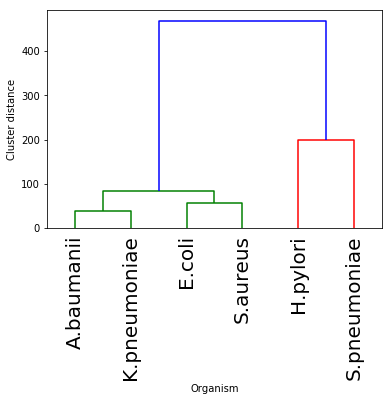

In [30]:
# scipy library can help out with this
from scipy.cluster.hierarchy import dendrogram, linkage, ward

# we need a numpy arrays to continue to the next step so?
# you don't need the columns GC content, GA_content and organism
samp_orgs = df2.drop(["GC_content","GA_content","organism"], axis = 1).values 

# test 1 with Linkage
# merges two clusters that have the smallest maximum distance between points (intro to ML)
merge = linkage(samp_orgs, method = "complete")

# test 2 with ward
# uses the ward variance minimization algorithm 
merge2 = ward(samp_orgs)
dendrogram(merge,
           labels = ["A.baumanii","E.coli","H.pylori","K.pneumoniae"
                                ,"S.aureus","S.pneumoniae"],
           leaf_rotation = 90,
           leaf_font_size = 20,
)
# show plot
plt.xlabel("Organism")
plt.ylabel("Cluster distance")
plt.show()

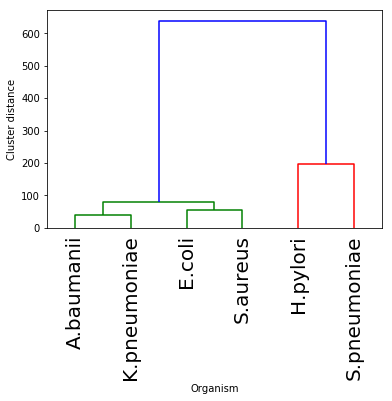

In [31]:
# With the ward function
dendrogram(merge2,
           labels = ["A.baumanii","E.coli","H.pylori","K.pneumoniae"
                                ,"S.aureus","S.pneumoniae"],
           leaf_rotation = 90,
           leaf_font_size = 20,
)
# label the axes and show the plot
plt.xlabel("Organism")
plt.ylabel("Cluster distance")
plt.show()

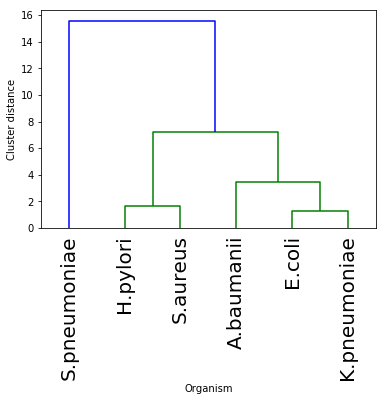

In [32]:
# using GC content alone
# test 3
samp_gc_content = linkage(content_nuc, method = "complete")
dendrogram(samp_gc_content,
           labels = ["A.baumanii","E.coli","H.pylori","K.pneumoniae"
                                ,"S.aureus","S.pneumoniae"],
           leaf_rotation = 90,
           leaf_font_size = 20,
)
# label axes and show plot
plt.xlabel("Organism")
plt.ylabel("Cluster distance")
plt.show()

The trees generated with Hierarchial clustering are different with the `Linkage` function, we get 3 clusters depending on your cluster distance and using the `ward` function we get only 3 clades whereas, the one using the gc content got a totally different tree. Note that the organisms most similiar are grouped together indicated by a specific color. But what brought me close to the full arrangement found in the phylogenetic tree? We'll explore that in the discussion.

Which one brought us closer to the full tree?

<p align="center">
<img src="http://www.dhushara.com/book/unraveltree/root.jpg" width="900">

</p>

# Discussion

From the calculations done above these sequences are different. They don't align so well -- check the file aligned_16S_Rrna.meg in the file data on my [github repository](https://github.com/Shuyib/Phylogenetic-tree-study/tree/master/data). This is due to a couple of reasons: we do not have the full sequence of the 16S Rrna gene for some organisms as i mentioned earlier, i've taken very few organisms that makes it even difficult for the software MEGA7 and clustal Omega to give better results in terms of making distance matrices between the bases. So what i'm doing is analogous to a situation of working with outliers. Removing them makes things worse since we won't have any sequences to compare.

What exactly is a distance matrix? Let's go back to phylogenetics tools -- they are two ways of comparing given sequences one are **distance based methods** and the other is **character based methods**. Guess what? We've used both in this analysis. You'll figure that out after reading this explanation i'm about to give.

A matrix consists of rows and columns of data of the same type. So when using distance based methods determining the number of mismatches between sequences sort of like this "AATTCC" == "AATTGG" == "AGGCC" but you do this with multiple sequences which gives rise to a pairwise distance matrix; this allows us to identify closely related species and the first two branches of the tree are formed. Then this matrix is remade, but from the previous step the most closely related species are found on the terminal branches. See the terminal node that is, marked red with *H.pylori* and *S.pneumoniae* 2nd last phylogenetic tree. In short, it involves estimating evolutionary distances and correcting for multiple events *Jukes & Cantor 1969* then making of a tree diagram based on the evolutionary distance. For example, the **Neighbour joining method**. 

Character based methods, aim to explain the relationship between the sequences that are most likely or give the simplest explanation observed in the data. They look at all possible trees and identify the single tree or set of trees that explains the data the best based on a specific criteria. For example **Maximum Likelihood**. 

Notice the trees generated with MEGA7 don't give a good bootstrap support for example 49 at the clade (numbers above the branch of the trees); however, some a good > 70 which is generally acceptable. I think also more parameter tuning could help of the following attributes: Gaps-Missing Data / Pairwise Deletion, Model / Nucleotide, Rates among sites / Different (Gamma Distributed) and Gamma Parameter in the MEGA 7 software.

Which tree brought us close to the full phylogenetic tree above? Let's try and make a small tree to find out. *K.pneumoniae* is not in the tree but according to many of it's properties: morphological and biochemical. I think it's safe to say it will be close to *E.coli* in fact they are on the same family Enterobacteriaceae. Whereas, *A.baumanii* is the phylum Proteobacteria with that in mind i suppose it will also be close to *E.coli* since it is also, in the proteobacteria phylum. Though, further way from *K.pneumoniae*. In summary, this is how i think the tree should look like (((*S.aureus*, *S.pneumoniae*), (*E.coli*, *K.pneumoniae*), *H.pylori*), *A.baumanii*) -- this is the newick representation of evolutionary relationships. NB. the strains used in the tree are different from the ones we used but it help us estimate a tree for our needs.

# Conclusion

From the short phylogenetic tree analysis, i've learned that to draw better trees we need to add more organisms - they don't have to be from the same phylum, the more variety the better. To deal with outliers like we've seen in the above analysis. It also seems like a good idea to use a variety of methods to draw phylogenetics trees like we did. On the other hand, parameter tuning is important. I think the tree that brought us closer to what the true phylogenetic tree would look like are, the one we got from Clustal Omega and the one i wrote in the newick representation. For the unsupervised learning methods, didn't do so good perhaps due to the different lengths of the nucleotides or a better numpy array could've been defined with more features exploring different things about the organisms.